### Import needed packages

In [1303]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import datetime as dt
from sklearn.preprocessing import OneHotEncoder


In [1304]:
print(sys.version)
print(np.__version__)
print(pd.__version__)

3.7.5 (default, Oct 31 2019, 15:18:51) [MSC v.1916 64 bit (AMD64)]
1.17.4
0.25.3


## Load Dataset##

In [1305]:
pd.set_option('display.max_columns', None)


In [1306]:
df_engagement = pd.read_csv('data/takehome_user_engagement.csv', parse_dates = ['time_stamp'] )
df_users = pd.read_csv('data/takehome_users.csv', encoding='latin1', parse_dates = ['creation_time'])

In [1307]:
print("users DF dimension is",df_users.shape)
print("users DF INFO ", df_users.info())
print("Null values ",df_users.isnull().sum())
df_users.head()


users DF dimension is (12000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB
users DF INFO  None
Null values  object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_i

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


#### We see missing values in columns 'last_session_creation_time' and 'invited_by_user_id' 

In [1308]:
print("User-Engagement DF dimension is",df_engagement.shape)
print("User-Engagement DF INFO ", df_engagement.info())
print("User-Engagement Null values ",df_engagement.isnull().sum())
df_engagement.head()


User-Engagement DF dimension is (207917, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB
User-Engagement DF INFO  None
User-Engagement Null values  time_stamp    0
user_id       0
visited       0
dtype: int64


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


#### Pretty clean dataset here. No missing values

## Imputing missing values

In [1309]:
'''
We see that last_session_creation time is not in datetime format. Let us convert using unit as 's'
'''
df_users.last_session_creation_time = pd.to_datetime(df_users.last_session_creation_time, unit='s')

In [1310]:
df_users.last_session_creation_time

0       2014-04-22 03:53:30
1       2014-03-31 03:45:04
2       2013-03-19 23:14:52
3       2013-05-22 08:09:28
4       2013-01-22 10:14:20
                ...        
11995   2013-09-06 06:14:15
11996   2013-01-15 18:28:37
11997   2014-04-27 12:45:16
11998   2012-06-02 11:55:59
11999   2014-01-26 08:57:12
Name: last_session_creation_time, Length: 12000, dtype: datetime64[ns]

#### Impute Missing data for columns - 'last_session_creation_time' & 'invited_by_user_id'
We see that the 'last_session_creation_time' is similar to 'creation_time', we could hence impute missings values of former with the latter. ####

In [1311]:
df_users['last_session_creation_time'] = df_users['last_session_creation_time'].fillna(df_users['creation_time'])


We cannot really guess the 'invited_by_user_id', so we would just replace the values with 0

In [1312]:
df_users['invited_by_user_id'] = df_users['invited_by_user_id'].replace(np.nan,0)

In [1313]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


We have cleaned the users dataframe.

## Data Wrangling

computing the 'adopted_users' feature.


In [1314]:
def get_rolling_count(df, freq):
    return df.rolling(freq, on='time_stamp')['visited'].count()

df_engagement['visited_7days'] = df_engagement.groupby('user_id', as_index=False, group_keys=False).apply(get_rolling_count, freq='7D')

df_engagement.tail()

,time_stamp,user_id,visited,visited_7days
207912,2013-09-06 06:14:15,11996,1,1.0
207913,2013-01-15 18:28:37,11997,1,1.0
207914,2014-04-27 12:45:16,11998,1,1.0
207915,2012-06-02 11:55:59,11999,1,1.0
207916,2014-01-26 08:57:12,12000,1,1.0


In [1315]:
#adopted = user_engagement[user_engagement.visited_7days >= 3]
adopted = df_engagement.loc[df_engagement['visited_7days'] >= 3].drop_duplicates('user_id', keep = 'first')
print("Number of adopted users: {}".format(len(adopted)))
adopted.head()

Number of adopted users: 1602


,time_stamp,user_id,visited,visited_7days
9,2014-02-09 03:45:04,2,1,3.0
27,2013-02-19 22:08:03,10,1,3.0
312,2014-03-13 11:46:38,20,1,3.0
331,2014-03-23 06:29:09,33,1,3.0
354,2012-12-26 19:05:07,42,1,3.0


In [1316]:
adopted_ids = adopted.user_id.tolist()

In [1317]:
#adopted_users
df_users['adopted'] = df_users['object_id'].isin(adopted_ids)
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False


Let's rename the object of users df as 'user_id' to keep the primary_key consistent.

In [1318]:
df_users.rename(columns = {'object_id':'user_id'}, inplace=True)
df_users.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'adopted'],
      dtype='object')

### Feature Extraction

Let us extract features from the columns of users/engagement dataframes that we can use to Visualize its impact on the adoptability.
1. 'time_spent' - Avg amount of time spent during every login.
2. 'domain' - Email domain of people that most people use during a login.
3. 'org_id, org_bin' - The group of users belonging to org_id binned based on their size as L/M/S.
4. 'login_to_create' - Number of days between first login and actual signup.
5. 'days_used' - time between initial login and latest login
6. 'num_referrals, referral_bin' - Number of users referred.Binned L/M/S

**Avg time spent when logged in**

In [1319]:
def calculate_interval(x):
    return(x - x.shift())
df_users['time_spent'] = df_engagement.groupby('user_id').time_stamp.apply(calculate_interval).dt.days.fillna(0)

**Domain based sign-ups**

In [1320]:
df_users['domain'] =pd.Categorical( [(x.split('@')[1].split('.')[0]) for x in df_users.email]) # extract domain
top5 = df_users.domain.value_counts(normalize=True)[0:3]
print("Top 3 domain emails are:", top5)
#Lets name other email domains as 'Other'
df_users.domain = [x if x in top5 else 'other' for x in df_users.domain]

Top 3 domain emails are: gmail         0.296833
yahoo         0.203917
jourrapide    0.104917
Name: domain, dtype: float64


**Number of users per org_id and their binning**

In [1321]:
#df_users.drop(columns=['org_size_x','org_size_y','num_org','org_bin'],inplace=True)

In [1322]:
org_size = pd.DataFrame(df_users.org_id.value_counts()).reset_index().rename(columns={'index':'org_id', 'org_id' :'org_size'})
df_users = pd.merge(df_users,org_size)
df_users['org_bin']= pd.cut(df_users['org_size'],[0,10,50,100,200,np.inf], labels=['XS','S','M','L','VL'],include_lowest=True )
df_users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,time_spent,domain,org_size,org_bin
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False,0.0,yahoo,75,M
1,151,2013-04-12 11:45:27,Goncalves Melissa,MelissaRibeiroGoncalves@yahoo.com,SIGNUP,2013-04-12 11:45:27,0,0,11,0.0,False,3.0,yahoo,75,M
2,179,2013-04-14 20:47:44,Millen Kai,KaiMillen@yahoo.com,ORG_INVITE,2013-04-15 20:47:44,0,0,11,7701.0,False,2.0,yahoo,75,M
3,254,2014-03-04 19:52:58,Simonsen Niels,NielsHSimonsen@jourrapide.com,PERSONAL_PROJECTS,2014-03-08 19:52:58,1,0,11,0.0,False,1.0,jourrapide,75,M
4,466,2012-11-09 22:43:48,Fannin Peggy,PeggyPFannin@jourrapide.com,PERSONAL_PROJECTS,2012-11-09 22:43:48,0,0,11,0.0,False,1.0,jourrapide,75,M


In [1323]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 15 columns):
user_id                       12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
adopted                       12000 non-null bool
time_spent                    12000 non-null float64
domain                        12000 non-null object
org_size                      12000 non-null int64
org_bin                       12000 non-null category
dtypes: bool(1), category(1), datetime64[ns](2), float64(2), int64(5), object(4)
memory usage: 1.3

**Number of days between first login and actual signup**

In [1324]:
#df_users.drop(columns=['time_stamp_x','time_stamp_y','firstime_login_x','firstime_login_y'],inplace=True)

In [1325]:
df_firstime_login = pd.pivot_table(df_engagement, values = 'time_stamp', index ='user_id', aggfunc=np.min).reset_index().rename(columns={'time_stamp':'firstime_login'})
print(df_firstime_login.head())
df_users = df_users.merge(df_firstime_login, on = 'user_id', how ='left')
df_users['login_to_create'] = (df_users.firstime_login - df_users.creation_time).dt.days
df_users['firstime_login'].fillna(0, inplace=True) ## Fill in missing values with '0'
df_users['login_to_create'].fillna(0, inplace=True) ## Fill in missing values with '0'
df_users.head()

   user_id      firstime_login
0        1 2014-04-22 03:53:30
1        2 2013-11-15 03:45:04
2        3 2013-03-19 23:14:52
3        4 2013-05-22 08:09:28
4        5 2013-01-22 10:14:20


,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,time_spent,domain,org_size,org_bin,firstime_login,login_to_create
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False,0.0,yahoo,75,M,2014-04-22 03:53:30,0.0
1,151,2013-04-12 11:45:27,Goncalves Melissa,MelissaRibeiroGoncalves@yahoo.com,SIGNUP,2013-04-12 11:45:27,0,0,11,0.0,False,3.0,yahoo,75,M,2013-04-12 11:45:27,0.0
2,179,2013-04-14 20:47:44,Millen Kai,KaiMillen@yahoo.com,ORG_INVITE,2013-04-15 20:47:44,0,0,11,7701.0,False,2.0,yahoo,75,M,2013-04-15 20:47:44,1.0
3,254,2014-03-04 19:52:58,Simonsen Niels,NielsHSimonsen@jourrapide.com,PERSONAL_PROJECTS,2014-03-08 19:52:58,1,0,11,0.0,False,1.0,jourrapide,75,M,2014-03-05 19:52:58,1.0
4,466,2012-11-09 22:43:48,Fannin Peggy,PeggyPFannin@jourrapide.com,PERSONAL_PROJECTS,2012-11-09 22:43:48,0,0,11,0.0,False,1.0,jourrapide,75,M,0,0.0


**Days Used**

In [1326]:
df_users['days_used'] = (df_users['last_session_creation_time'] - df_users['creation_time']).dt.components.days
df_users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,time_spent,domain,org_size,org_bin,firstime_login,login_to_create,days_used
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False,0.0,yahoo,75,M,2014-04-22 03:53:30,0.0,0
1,151,2013-04-12 11:45:27,Goncalves Melissa,MelissaRibeiroGoncalves@yahoo.com,SIGNUP,2013-04-12 11:45:27,0,0,11,0.0,False,3.0,yahoo,75,M,2013-04-12 11:45:27,0.0,0
2,179,2013-04-14 20:47:44,Millen Kai,KaiMillen@yahoo.com,ORG_INVITE,2013-04-15 20:47:44,0,0,11,7701.0,False,2.0,yahoo,75,M,2013-04-15 20:47:44,1.0,1
3,254,2014-03-04 19:52:58,Simonsen Niels,NielsHSimonsen@jourrapide.com,PERSONAL_PROJECTS,2014-03-08 19:52:58,1,0,11,0.0,False,1.0,jourrapide,75,M,2014-03-05 19:52:58,1.0,4
4,466,2012-11-09 22:43:48,Fannin Peggy,PeggyPFannin@jourrapide.com,PERSONAL_PROJECTS,2012-11-09 22:43:48,0,0,11,0.0,False,1.0,jourrapide,75,M,0,0.0,0


**Number of users referred by any particular user**

In [1327]:
num_referrals = pd.DataFrame(df_users.invited_by_user_id.value_counts()).reset_index().rename(columns={'index':'user_id', 'invited_by_user_id' :'num_referrals'})
df_users= pd.merge(df_users,num_referrals, how='left')
df_users.num_referrals.fillna(0, inplace=True)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 19 columns):
user_id                       12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
adopted                       12000 non-null bool
time_spent                    12000 non-null float64
domain                        12000 non-null object
org_size                      12000 non-null int64
org_bin                       12000 non-null category
firstime_login                12000 non-null object
login_to_create               12000 non-null f

In [1330]:
# #plot distribution
# fig, ax = plt.subplots(figsize=(15, 6))
# sns.countplot(df_users.num_referrals, ax=ax)
# ax.set_title('Distribution of number of referrals', fontsize=16)
# ax.set_xlabel('Number of referral', fontsize=12)
# ax.set_ylabel('Frequency', fontsize=12)
# plt.show()


**Binned by num_referral**

In [1329]:
df_users['referral_bin']= pd.cut(df_users['num_referrals'],[-1,0,1,5,np.inf], labels=['Not_invited','S','M','L'],include_lowest=True )
df_users.tail()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,time_spent,domain,org_size,org_bin,firstime_login,login_to_create,days_used,num_referrals,referral_bin
11995,7406,2014-03-01 07:38:26,Lund Rikke,RikkeTLund@gmail.com,ORG_INVITE,2014-04-13 07:38:26,0,1,396,7291.0,False,1.0,gmail,9,XS,2014-03-01 07:38:26,0.0,43,0.0,Not_invited
11996,8680,2013-07-10 07:26:43,Cunha Clara,ClaraCastroCunha@gmail.com,PERSONAL_PROJECTS,2013-07-11 07:26:43,0,0,396,0.0,False,0.0,gmail,9,XS,2013-07-11 07:26:43,1.0,1,0.0,Not_invited
11997,11814,2013-08-25 13:43:14,Hennings Emily,EmilyHennings@hotmail.com,PERSONAL_PROJECTS,2013-08-25 13:43:14,1,0,396,0.0,False,1.0,other,9,XS,2013-08-25 13:43:14,0.0,0,2.0,M
11998,8535,2014-02-08 01:52:09,Meister Mike,MikeMeister@cuvox.de,PERSONAL_PROJECTS,2014-02-13 01:52:09,0,0,416,0.0,False,2.0,other,2,XS,2014-02-13 01:52:09,5.0,5,0.0,Not_invited
11999,8972,2012-09-20 13:22:06,Cunha Enzo,EnzoRibeiroCunha@gmail.com,SIGNUP_GOOGLE_AUTH,2012-09-20 13:22:06,0,1,416,0.0,False,1.0,gmail,2,XS,2012-09-20 13:22:06,0.0,0,0.0,Not_invited


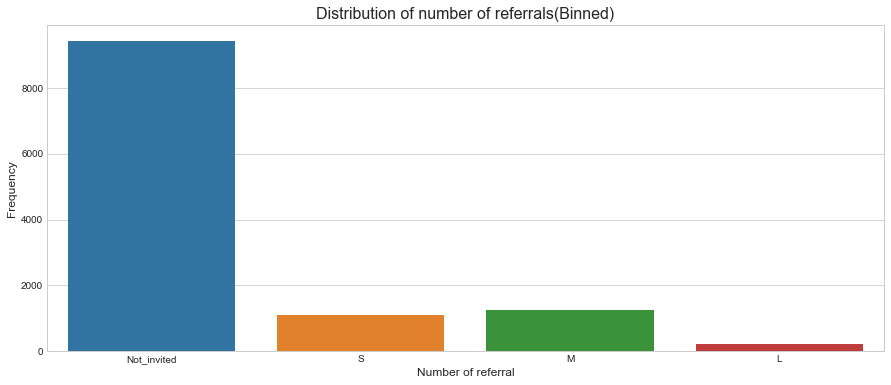

In [1337]:
#plot distribution
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(df_users.referral_bin, ax=ax)
ax.set_title('Distribution of number of referrals(Binned)', fontsize=16)
ax.set_xlabel('Number of referral', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()


In [1331]:
df_users.dtypes

user_id                                int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
adopted                                 bool
time_spent                           float64
domain                                object
org_size                               int64
org_bin                             category
firstime_login                        object
login_to_create                      float64
days_used                              int64
num_referrals                        float64
referral_bin                        category
dtype: object

In [1332]:
# df_final_users_info.sort_index(inplace=True)
# df_final_users_info.head()

In [1333]:
df_users.creation_source = pd.Categorical(df_users.creation_source)

### Exploratory Data Analysis ###

In [1334]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 20 columns):
user_id                       12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null category
last_session_creation_time    12000 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
adopted                       12000 non-null bool
time_spent                    12000 non-null float64
domain                        12000 non-null object
org_size                      12000 non-null int64
org_bin                       12000 non-null category
firstime_login                12000 non-null object
login_to_create               12000 non-null

In [1335]:
df_users['domain'] = pd.Categorical(df_users.domain)

In [1336]:
df_users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,time_spent,domain,org_size,org_bin,firstime_login,login_to_create,days_used,num_referrals,referral_bin
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False,0.0,yahoo,75,M,2014-04-22 03:53:30,0.0,0,0.0,Not_invited
1,151,2013-04-12 11:45:27,Goncalves Melissa,MelissaRibeiroGoncalves@yahoo.com,SIGNUP,2013-04-12 11:45:27,0,0,11,0.0,False,3.0,yahoo,75,M,2013-04-12 11:45:27,0.0,0,0.0,Not_invited
2,179,2013-04-14 20:47:44,Millen Kai,KaiMillen@yahoo.com,ORG_INVITE,2013-04-15 20:47:44,0,0,11,7701.0,False,2.0,yahoo,75,M,2013-04-15 20:47:44,1.0,1,0.0,Not_invited
3,254,2014-03-04 19:52:58,Simonsen Niels,NielsHSimonsen@jourrapide.com,PERSONAL_PROJECTS,2014-03-08 19:52:58,1,0,11,0.0,False,1.0,jourrapide,75,M,2014-03-05 19:52:58,1.0,4,0.0,Not_invited
4,466,2012-11-09 22:43:48,Fannin Peggy,PeggyPFannin@jourrapide.com,PERSONAL_PROJECTS,2012-11-09 22:43:48,0,0,11,0.0,False,1.0,jourrapide,75,M,0,0.0,0,1.0,S


### Let's plot univariate distribution of all the features ###

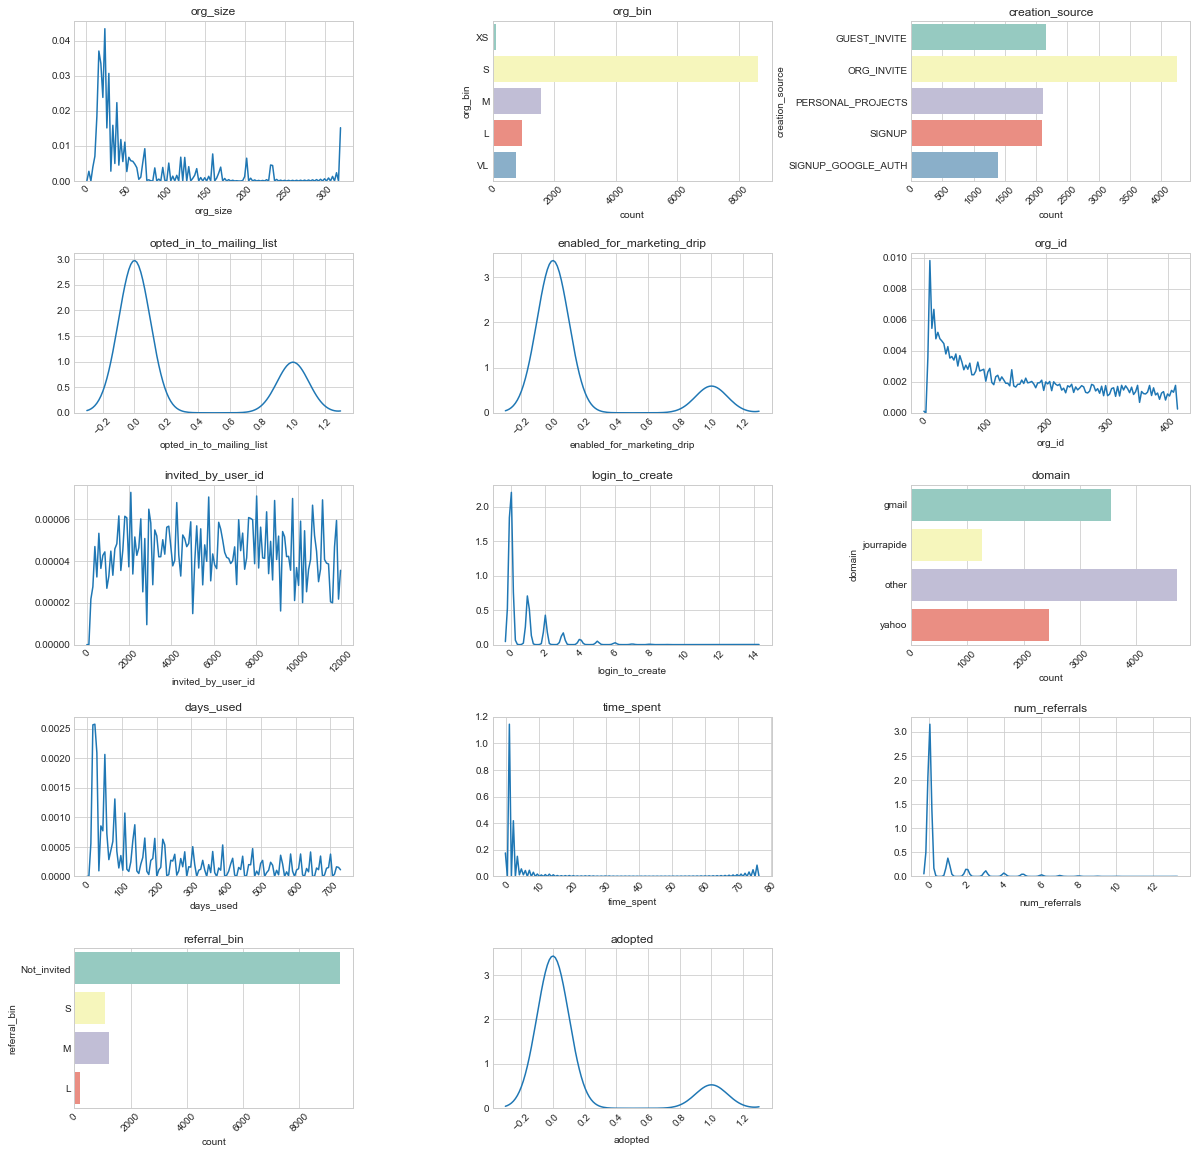

In [1338]:
# Let’s plot the distribution of each feature

columns_plots = ['org_size', 'org_bin', 'creation_source', 'opted_in_to_mailing_list',\
                  'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',\
                  'login_to_create', 'domain', 'days_used', 'time_spent', 'num_referrals',\
                  'referral_bin', 'adopted']

def plot_distribution(dataset, cols=3, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = np.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if (dataset[column].dtype.name in ['category', np.bool]): #If Categorical feature
            g = sns.countplot(y=column, data=dataset, palette='Set3')
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=45)
        else: #Numerical
            g = sns.distplot(dataset[column], hist=False, kde_kws={'bw':0.1})
            plt.xticks(rotation=45)
    
plot_distribution(df_users[columns_plots],  cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [1339]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 20 columns):
user_id                       12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null category
last_session_creation_time    12000 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
adopted                       12000 non-null bool
time_spent                    12000 non-null float64
domain                        12000 non-null category
org_size                      12000 non-null int64
org_bin                       12000 non-null category
firstime_login                12000 non-null object
login_to_create               12000 non-nu

### Let's plot to perform Bivariate Analysis ###

In [1351]:
df_users.adopted.dtype

dtype('int64')

In [ ]:
'adopted', 'org_size_inf_num', 'avg_login', 'num_referrals', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'days_creation_firstLogin'

In [1381]:
df_users.opted_in_to_mailing_list.describe()
df_users.num_referrals.describe()
df_users.enabled_for_marketing_drip.describe()



count    12000.000000
mean         0.149333
std          0.356432
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: enabled_for_marketing_drip, dtype: float64

In [1356]:
df_users[cont_cols].dtypes


user_id                         int64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted                         int64
time_spent                    float64
org_size                        int64
login_to_create               float64
days_used                       int64
num_referrals                 float64
dtype: object

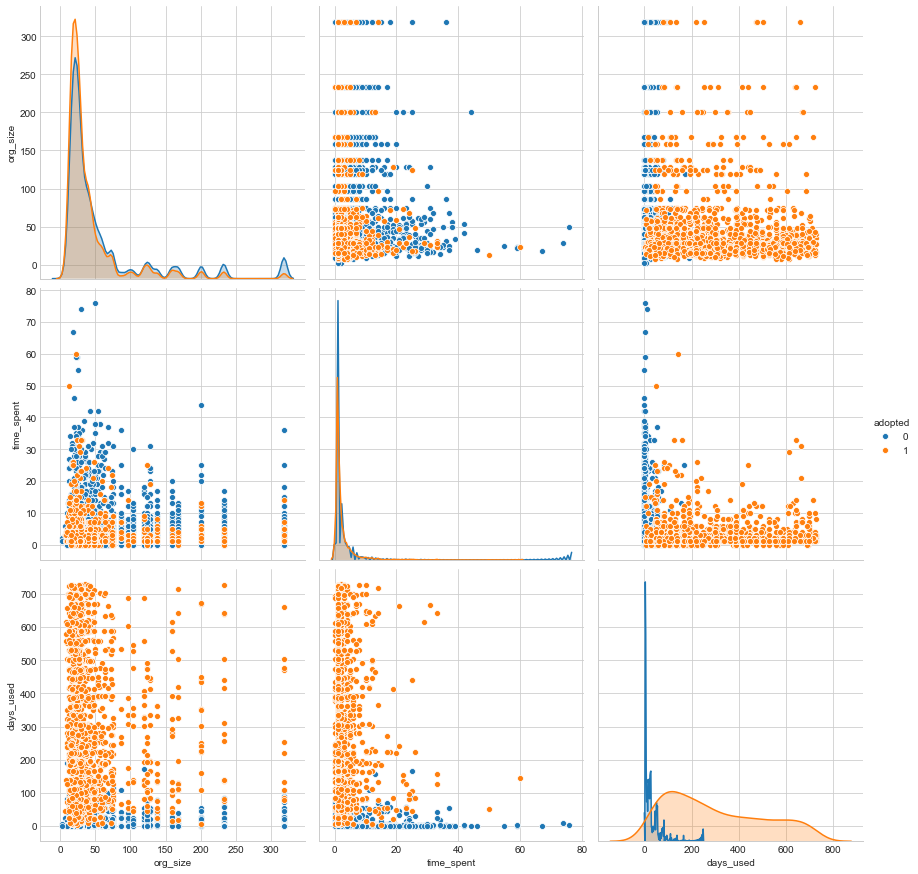

In [1386]:
cont_cols = [col for col in df_users if df_users[col].dtype in ['int64','float64']]
#df_users.adopted = df_users.adopted.astype('int64')
#cont_cols.append('adopted')
#corr = df_users[cont_cols].corr()
#ax = sns.heatmap(corr, annot=True, cmap='YlGnBu', square=True)
#fig, ax = plt.subplots(figsize=(15, 6))
cols = ['org_size','time_spent', 'adopted','days_used']
# Cannot include these columns since it errors saying - 
#RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.
#['num_referrals', 'opted_in_to_mailing_list' , 'enabled_for_marketing_drip']
new_df = df_users[cols]
sns.pairplot(new_df, hue='adopted', diag_kind="kde",height=4);


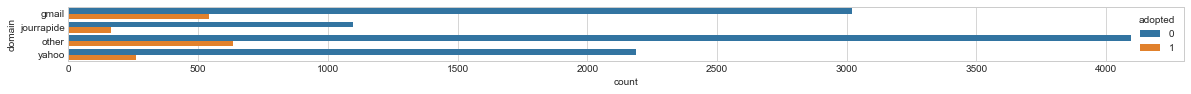

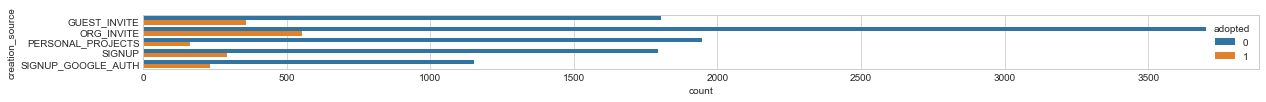

In [1387]:
# categorical bi-variate analysis
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,1)) 
sns.countplot(y='domain', hue="adopted", data=df_users);
fig = plt.figure(figsize=(20,1))
sns.countplot(y='creation_source', hue="adopted", data=df_users);

### Feature Engineering ###

We can now drop the columns that are 'object' typed. We must perform on-hot encoding/get_dummies on categorical features for processing further.

In [1388]:
omit_cols = [col for col in df_users if df_users.dtypes[col] in ['object','<M8[ns]'] ]
redundant_cols = [ 'user_id', 'org_id', 'invited_by_user_id', 'org_size']
df_users.drop(columns=omit_cols, inplace=True)
df_users.drop(columns=redundant_cols, inplace=True)
X = df_users.drop('adopted', axis=1)
y = df_users.adopted

#### Encoding categorical features ####

In [1389]:
X_encoded_getdummies = pd.get_dummies(X, columns = cat_cols, prefix_sep='_', drop_first=True) 
#The drop_first=True drops one column from the resulted dummy features. The purpose is to avoid multicollinearity.

In [1390]:
X = X_encoded_getdummies

In [1391]:
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,time_spent,login_to_create,days_used,num_referrals,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,domain_jourrapide,domain_other,domain_yahoo,org_bin_S,org_bin_M,org_bin_L,org_bin_VL,referral_bin_S,referral_bin_M,referral_bin_L
0,1,0,0.0,0.0,0,0.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,3.0,0.0,0,0.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
2,0,0,2.0,1.0,1,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
3,1,0,1.0,1.0,4,0.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,1.0,0.0,0,1.0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


### Feature Selection ###

We could look at the feature importance that is spitted out by a random forest model.

Feature ranking:
1. feature 4 (0.88)
2. feature 2 (0.03)
3. feature 3 (0.02)
4. feature 5 (0.01)
5. feature 11 (0.01)
6. feature 0 (0.01)
7. feature 6 (0.01)
8. feature 1 (0.01)
9. feature 8 (0.00)
10. feature 7 (0.00)
11. feature 12 (0.00)
12. feature 13 (0.00)
13. feature 10 (0.00)
14. feature 9 (0.00)
15. feature 17 (0.00)
16. feature 14 (0.00)
17. feature 18 (0.00)
18. feature 16 (0.00)
19. feature 15 (0.00)
20. feature 19 (0.00)


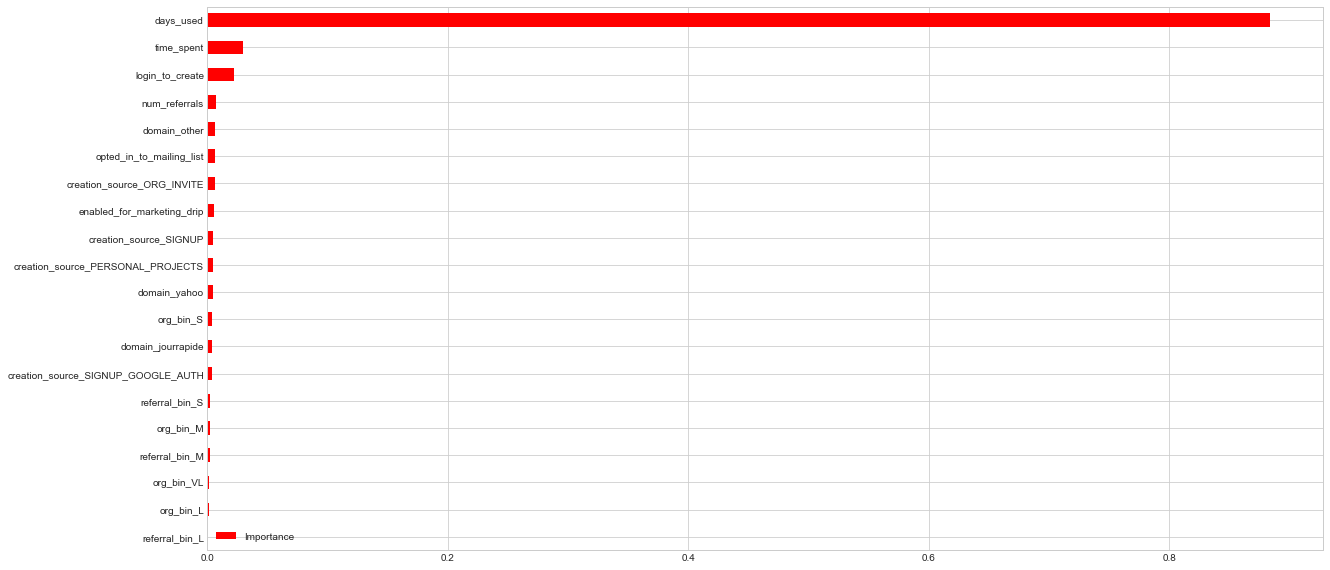

In [1392]:
from sklearn.ensemble import RandomForestClassifier

# Using Random Forest to gain an insight on Feature Importance
rfclf = RandomForestClassifier()
rfclf.fit(X, y)

plt.style.use('seaborn-whitegrid')
importances = rfclf.feature_importances_


std = np.std([tree.feature_importances_ for tree in rfclf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%.2f)" % (f + 1, indices[f], importances[indices[f]]))

#####
df_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"])
df_importances.sort_values(by='Importance', ascending=True).plot(kind='barh', color= 'red',figsize=(20,len(importances)/2));

### Feature correlation ###

We make sure there is no correlation between independent variables. There must be high correlation between independant and dependant variables. We can find it from correlation matrix.
Make sure to remove categorical features that are already hot-encoded.

In [1393]:
X.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'time_spent',
       'login_to_create', 'days_used', 'num_referrals',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH',
       'domain_jourrapide', 'domain_other', 'domain_yahoo', 'org_bin_S',
       'org_bin_M', 'org_bin_L', 'org_bin_VL', 'referral_bin_S',
       'referral_bin_M', 'referral_bin_L'],
      dtype='object')

In [1394]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 20 columns):
opted_in_to_mailing_list              12000 non-null int64
enabled_for_marketing_drip            12000 non-null int64
time_spent                            12000 non-null float64
login_to_create                       12000 non-null float64
days_used                             12000 non-null int64
num_referrals                         12000 non-null float64
creation_source_ORG_INVITE            12000 non-null uint8
creation_source_PERSONAL_PROJECTS     12000 non-null uint8
creation_source_SIGNUP                12000 non-null uint8
creation_source_SIGNUP_GOOGLE_AUTH    12000 non-null uint8
domain_jourrapide                     12000 non-null uint8
domain_other                          12000 non-null uint8
domain_yahoo                          12000 non-null uint8
org_bin_S                             12000 non-null uint8
org_bin_M                             12000 non-null uint8


In [1395]:
corr_Xy = pd.concat([X,y], axis=1)


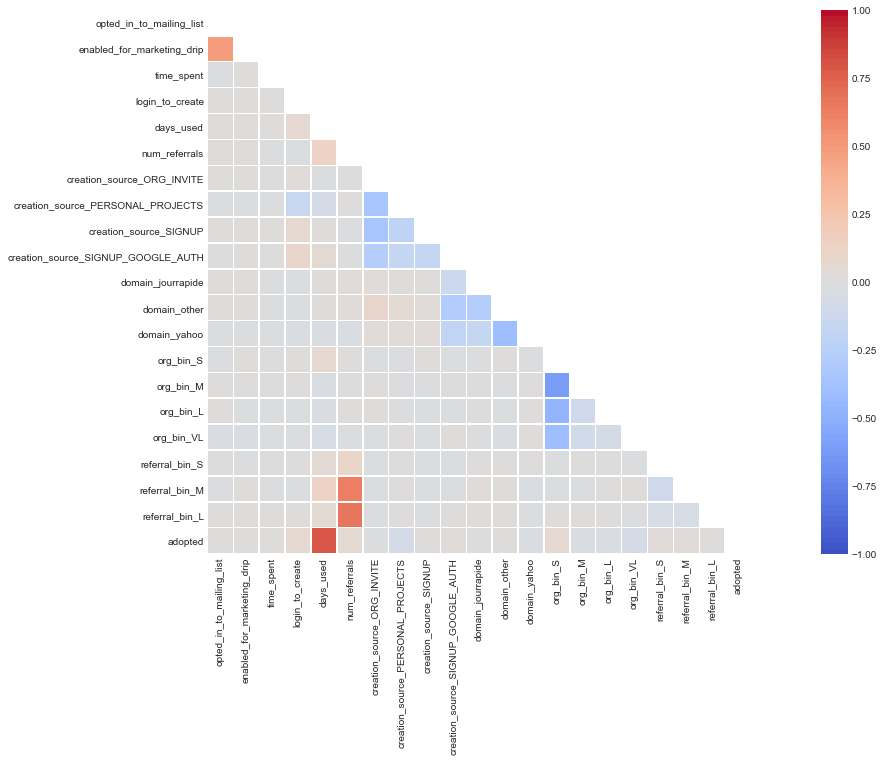

In [1396]:
# A heatmap is best suited to visualize a corr matrix
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

#plt.subplot(1, 2, 1)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_Xy.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_Xy.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("coolwarm", 100), 
            mask=mask, 
            linewidths=.5);

# plt.subplot(1, 2, 2)

We do see that days_used is highly correlated to the 'adoption' of a user. 
num_referrals is obviously correlated to its the binned categories. We will still keep this to see if metrics can be improved.

### Modeling ###

In [1397]:
df = X.join(y)
df.to_csv('data/to_model.csv')

In [1398]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

# set random_state SEED variable
SEED = 36

In [1399]:
# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = SEED)

train_total = len(y_train)
print('Training Set\nTotal:\t\t{}'.format(train_total))

test_total = len(y_test)
print('Test Set\nTotal:\t\t{}'.format(test_total))

Training Set
Total:		8400
Test Set
Total:		3600


### Algorithms ###

Let's try all of the classification algorithm learnt so far.
- KNN
- Logistic Regression
- Random Forest
- Naive Bayes
- Stochastic Gradient Decent
- Linear SVC
- Decision Tree
- Gradient Boosted Trees

In [1400]:
#import sklearn.ensemble as ske
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
#tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

import time
import datetime

In [1401]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

we will use cross_val_score helps us find how our model is doing and further help us choose the hyper-paramters.

Helper function to run any particular ML algorithm

In [1402]:
def fit_ml_algo(algo, X_train, y_train, X_test, y_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

### Logistic Regression ###

In [1403]:
# Logistic Regression - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 8.40 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.957 (std: 0.003)
Parameters: {'penalty': 'l2', 'intercept_scaling': 80055346026824.05, 'class_weight': 'balanced', 'C': 7.397532957235254e-10}

Model with rank: 2
Mean validation score: 0.867 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 0.6949990299484257, 'class_weight': None, 'C': 8.967993184401919e-14}

Model with rank: 3
Mean validation score: 0.281 (std: 0.163)
Parameters: {'penalty': 'l2', 'intercept_scaling': 24588898.48108312, 'class_weight': 'balanced', 'C': 3.3170504372048814e-13}

Model with rank: 4
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'intercept_scaling': 1.2502869579520908e-10, 'class_weight': None, 'C': 6.448830291107155e-06}

Model with rank: 5
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'intercept_scaling': 393966728375271.7, 'class_weight': None, 'C': 35.494005764632355}



In [1404]:
# Logistic Regression
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, y_test,
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 97.36
Accuracy CV 10-Fold: 97.44
Running Time: 0:00:00.680897


In [1405]:
print(metrics.classification_report(y_train, train_pred_log))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7284
           1       0.94      0.87      0.90      1116

    accuracy                           0.97      8400
   macro avg       0.96      0.93      0.94      8400
weighted avg       0.97      0.97      0.97      8400



In [1406]:
print(metrics.classification_report(y_test, test_pred_log))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3114
           1       0.92      0.88      0.90       486

    accuracy                           0.97      3600
   macro avg       0.95      0.93      0.94      3600
weighted avg       0.97      0.97      0.97      3600



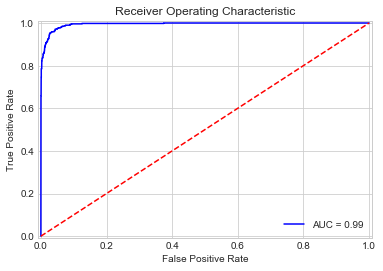

In [1407]:
plot_roc_curve(y_test, probs_log)


### K-Nearest Neighbors

In [1408]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, y_test,
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 97.11
Accuracy CV 10-Fold: 96.92
Running Time: 0:00:01.247090


In [1409]:
print(metrics.classification_report(y_train, train_pred_knn))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7284
           1       0.89      0.87      0.88      1116

    accuracy                           0.97      8400
   macro avg       0.94      0.93      0.93      8400
weighted avg       0.97      0.97      0.97      8400



In [1410]:
print(metrics.classification_report(y_test, test_pred_knn))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3114
           1       0.90      0.88      0.89       486

    accuracy                           0.97      3600
   macro avg       0.94      0.93      0.94      3600
weighted avg       0.97      0.97      0.97      3600



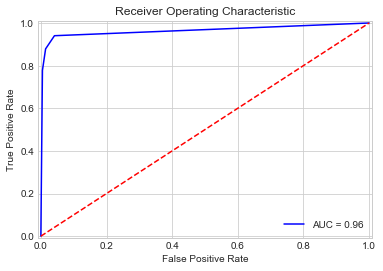

In [1411]:
plot_roc_curve(y_test, probs_knn)


### Gaussian Naive Bayes ###

In [1412]:
#Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, y_test,
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 95.31
Accuracy CV 10-Fold: 95.37
Running Time: 0:00:00.105959


In [1413]:
print(metrics.classification_report(y_train, train_pred_gaussian))


              precision    recall  f1-score   support

           0       0.99      0.96      0.97      7284
           1       0.77      0.92      0.84      1116

    accuracy                           0.95      8400
   macro avg       0.88      0.94      0.91      8400
weighted avg       0.96      0.95      0.96      8400



In [1414]:
print(metrics.classification_report(y_test, test_pred_gaussian))


              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3114
           1       0.77      0.93      0.84       486

    accuracy                           0.95      3600
   macro avg       0.88      0.94      0.91      3600
weighted avg       0.96      0.95      0.95      3600



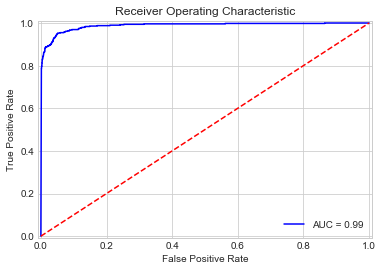

In [1415]:
plot_roc_curve(y_test, probs_gau)


### Linear SVC ###

In [1416]:
# Linear SVC
start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, _ = fit_ml_algo(LinearSVC(),
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test, y_test,
                                                                                           10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

C:\Users\harid\.conda\envs\TestEnv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 96.17
Accuracy CV 10-Fold: 96.54
Running Time: 0:00:01.987814


In [1417]:
print(metrics.classification_report(y_train, train_pred_svc))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7284
           1       0.93      0.79      0.86      1116

    accuracy                           0.97      8400
   macro avg       0.95      0.89      0.92      8400
weighted avg       0.96      0.97      0.96      8400



In [1418]:
print(metrics.classification_report(y_test, test_pred_svc))


              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3114
           1       0.80      0.96      0.87       486

    accuracy                           0.96      3600
   macro avg       0.90      0.96      0.92      3600
weighted avg       0.97      0.96      0.96      3600



### Stochastic Gradient Boost ###

In [1419]:
#Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_algo(SGDClassifier(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, y_test,
                                                                 10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 97.33
Accuracy CV 10-Fold: 97.37
Running Time: 0:00:00.216000


In [1420]:
print(metrics.classification_report(y_train, train_pred_sgd))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7284
           1       0.92      0.88      0.90      1116

    accuracy                           0.97      8400
   macro avg       0.95      0.93      0.94      8400
weighted avg       0.97      0.97      0.97      8400



In [1421]:
print(metrics.classification_report(y_test, test_pred_sgd))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3114
           1       0.93      0.87      0.90       486

    accuracy                           0.97      3600
   macro avg       0.95      0.93      0.94      3600
weighted avg       0.97      0.97      0.97      3600



### Decision Tree Classifier ###

In [1422]:
# Decision Tree Classifier
start_time = time.time()

def fit_ml_algo_clf(algo, X_train, y_train, X_test, y_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs, model

train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt, clf_obj = fit_ml_algo_clf(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, y_test,
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 96.19
Accuracy CV 10-Fold: 96.07
Running Time: 0:00:00.227218


In [1423]:
print(metrics.classification_report(y_train, train_pred_dt))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7284
           1       0.84      0.86      0.85      1116

    accuracy                           0.96      8400
   macro avg       0.91      0.92      0.92      8400
weighted avg       0.96      0.96      0.96      8400



In [1424]:
print(metrics.classification_report(y_test, test_pred_dt))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3114
           1       0.85      0.87      0.86       486

    accuracy                           0.96      3600
   macro avg       0.92      0.92      0.92      3600
weighted avg       0.96      0.96      0.96      3600



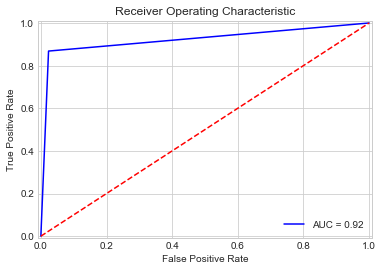

In [1425]:
plot_roc_curve(y_test, probs_dt)


### Random Forest Classifier ###

In [1426]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 0.71 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.974 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 12}

Model with rank: 2
Mean validation score: 0.974 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 10, 'min_samples_split': 7}

Model with rank: 3
Mean validation score: 0.974 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 4}

Model with rank: 4
Mean validation score: 0.973 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 9, 'min_samples_split': 2}

Model with rank: 5
Mean validation score: 0.973 (std: 0.003)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max

In [1427]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, y_test,
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 97.36
Accuracy CV 10-Fold: 97.3
Running Time: 0:00:00.297002


In [1428]:
print(metrics.classification_report(y_train, train_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7284
           1       0.92      0.87      0.90      1116

    accuracy                           0.97      8400
   macro avg       0.95      0.93      0.94      8400
weighted avg       0.97      0.97      0.97      8400



In [1429]:
print(metrics.classification_report(y_test, test_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3114
           1       0.92      0.88      0.90       486

    accuracy                           0.97      3600
   macro avg       0.95      0.94      0.94      3600
weighted avg       0.97      0.97      0.97      3600



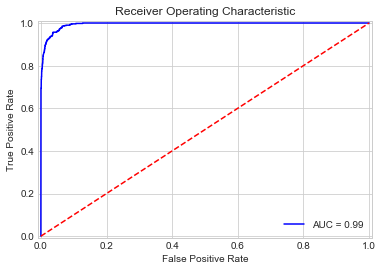

In [1430]:
plot_roc_curve(y_test, probs_rf)

### Gradient Boosting Trees

In [1431]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, y_test,                                                                            
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 97.25
Accuracy CV 10-Fold: 97.36
Running Time: 0:00:01.980817


In [1432]:
print(metrics.classification_report(y_train, train_pred_gbt))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7284
           1       0.93      0.87      0.90      1116

    accuracy                           0.97      8400
   macro avg       0.95      0.93      0.94      8400
weighted avg       0.97      0.97      0.97      8400



In [1433]:
print(metrics.classification_report(y_test, test_pred_gbt))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3114
           1       0.92      0.87      0.90       486

    accuracy                           0.97      3600
   macro avg       0.95      0.93      0.94      3600
weighted avg       0.97      0.97      0.97      3600



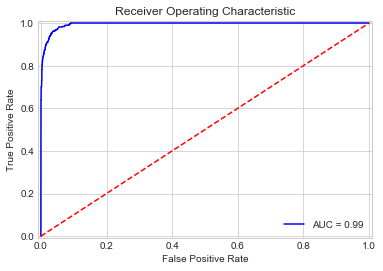

In [1434]:
plot_roc_curve(y_test, probs_gbt)

### Results ###

In [1435]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Accuracy': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Logistic Regression,97.36
2,Random Forest,97.36
4,Stochastic Gradient Decent,97.33
7,Gradient Boosting Trees,97.25
0,KNN,97.11
6,Decision Tree,96.19
5,Linear SVC,96.17
3,Naive Bayes,95.31


### 10-Fold CV ###

In [1436]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Accuracy (10-fold CV)': [
        acc_cv_knn, 
        acc_cv_log,     
        acc_cv_rf, 
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
models.sort_values(by='Accuracy (10-fold CV)', ascending=False)

,Model,Accuracy (10-fold CV)
1,Logistic Regression,97.44
4,Stochastic Gradient Decent,97.37
7,Gradient Boosting Trees,97.36
2,Random Forest,97.30
0,KNN,96.92
5,Linear SVC,96.54
6,Decision Tree,96.07
3,Naive Bayes,95.37


### Conclusion ###

In order to narrow down on the important features, we visualized using heatmap(correlation matrix) and feature_importance_ (as a result of fitting the model in a RF and deducing features from there).

From the heatmap we see that user adoption is directly and highly correlated to how much time a person spends on the site (aka high user engagement) and to some extent the org he belongs to, smaller the number of people in the org, higher the chances of being adopted.

From modeling we see again that feature importance in the following order: time_spent, days between first login and sign up, number of referrals and opted_in_to_mailing list.

Our best model (with highest classification metrics) with 10-fold CV is Logistic Regression.

### Reference###

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
